In [1]:
### compare environmental concentrations 
###in water bodies to concentration limits

In [1]:
import numpy  as np
import  pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
dir_in='C:/Users/easpi/Documents/PhD Water Footprint/Papers/water footprint scoping/'

In [3]:
intersection=gpd.read_file(dir_in + "gis/intersect_basins_countries.gpkg")
intersection=intersection.drop(columns={"OBJECTID"})
intersection

countries = pd.unique(intersection["Country"])
basins = pd.unique(intersection["id_basin_pcrglob"])

basins_map  = gpd.read_file(dir_in + "gis/basins shapefile/basins_5min_pcrglobwb_withparam.gpkg").set_index("id_basin_pcrglob")
basins_map=basins_map.loc[basins]

intersection = intersection.set_index(['Country'])
intersection

LCIA_NR  = gpd.read_file(dir_in + "code/output/LCIA_NR.gpkg").set_index("id_basin_pcrglob")



In [18]:
qr=pd.read_excel(dir_in+"water quality/quality_requirements_casmetal.xlsx")
qr.columns# phosphorus CAS=7723-14-0
qr=qr.set_index(["CAS"])
qr

,parameter_name,preferred_name,molecular_formula,DTXSID,unit,QR_domestic1,QR_ industry,QR_agriculture1,ref,Unnamed: 10
CAS,,,,,,,,,,
ND,Fecal coliforms,Fecal coliforms,NaN,NaN,UFC/100ml,20,2000,200,NaN,NaN
ND,Microcystin-LR,Microcystin-LR,NaN,NaN,mg/l,0.001,0.001,0.01,NaN,NaN
ND,True color,True color,NaN,NaN,Color unit (CU),15,50,100,NaN,NaN
ND,Suspended Solids,Suspended Solids,NaN,NaN,mg/l,25,100,25,NaN,NaN
ND,Total Dissolved Solids),Total Dissolved Solids),NaN,NaN,mg/l,500,500,2000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3018-12-0,Dichloroacétonitrile,Dichloroacetonitrile,NaN,https://comptox.epa.gov/dashboard/chemical/det...,mg/l,0.02,0.02,0.2,NaN,NaN
3252-43-5,Dibromoacétonitrile,Dibromoacetonitrile,NaN,DTXSID4021551,mg/l,0.07,0.07,0.7,NaN,NaN
506-77-4,Chlorure de cyanogène,Cyanogen chloride,NaN,DTXSID8021434,mg/l,0.07,0.07,0.7,NaN,NaN


In [5]:
#add fate and format cas numer again 
CF_usetox = pd.read_excel(dir_in + "CFs/usetox_freshwater_ecotox.xlsx")
CF_usetox=CF_usetox.set_index(["CAS"])
#no phosphorus fate, use payen 2021 instead

In [6]:
#import diluiton matrix 
exposure_volume= pd.read_csv(dir_in+"code/output/channel_storage_month2010_m3.csv")
exposure_volume=exposure_volume.iloc[:,1:]
exposure_volume.columns=["basin",1,2,3,4,5,6,7,8,9,10,11,12]
#["1","2","3","4","5","6",'7','8','9','10','11','12']
exposure_volume=pd.melt(exposure_volume,id_vars= 'basin',value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name="month", value_name="channel_storage")#use panda melt to converto to right format!

exposure_volume=exposure_volume.set_index(["basin","month"])
exposure_volume=exposure_volume.loc[(basins)]
exposure_volume#in m3

channel_storage
basin   month                 
2501.0  1           1103452.60
        2            794567.70
        3            562447.30
        4            525469.44
        5           5708058.00
...                        ...
13232.0 8           7537427.50
        9           6623210.00
        10          5941288.00
        11          6990748.00
        12          9234096.00

[12372 rows x 1 columns]

derive form the LCI dataset emissions in kg/basin/month the concentration dataset in kg/m3=FF*emissions/channel storage
quality requirements are in mg/L = 10-3 kg/m3

In [7]:
#import emissions
LCI=pd.read_csv(dir_in+"code/output/LCI_basin_part3.csv").set_index(["basin", "month","activity"])
#kg/month emissions m3/month consumption
LCI

WC              P  542-75-6   94-75-7  \
basin month activity                                                      
2501  1     domestic     9365.175781       0.000000  0.000000  0.000123   
            industry        0.000000       0.000000  0.000000  0.000326   
            agriculture  5041.759766     456.484525  0.000000  0.001256   
      2     domestic     9365.175781       0.000000  0.000000  0.000123   
            industry        0.000000       0.000000  0.000000  0.000326   
...                              ...            ...       ...       ...   
13232 11    industry        0.000000       0.000000  0.000000  0.000561   
            agriculture     0.000000  207892.703637  0.125003  0.000000   
      12    domestic        0.000000       0.000000  0.000000  0.000317   
            industry        0.000000       0.000000  0.000000  0.000561   
            agriculture     0.000000  207892.703637  0.125003  0.000000   

                          94-82-6  122-88-3  30560-19-1  34256-82-1  \
basin month activity                                                  
2501  1     domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.001256       0.0    0.000440    0.002642   
      2     domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
...                           ...       ...         ...         ...   
13232 11    industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.000000       0.0    0.000408    0.000000   
      12    domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.000000       0.0    0.000408    0.000000   

                         135158-54-2  50594-66-6  ...  104-40-5  608-93-5  \
basin month activity                              ...                       
2501  1     domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000455  0.067762   
            agriculture          0.0    0.000187  ...  0.000000  0.000000   
      2     domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000455  0.067762   
...                              ...         ...  ...       ...       ...   
13232 11    industry             0.0    0.000000  ...  0.000784  0.028593   
            agriculture          0.0    0.000000  ...  0.000000  0.000000   
      12    domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000784  0.028593   
            agriculture          0.0    0.000000  ...  0.000000  0.000000   

                         465-73-6  8001-35-2  50-29-3  60-57-1  309-00-2  \
basin month activity                                                       
2501  1     domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   
      2     domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
...                           ...        ...      ...      ...       ...   
13232 11    industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   
      12    domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   

                         72-20-8  76-44-8  2385-85-5  
basin month activity                                  
2501  1     domestic         0.0 

In [13]:
np.sum(LCI["WC"])/1e9# 30,426 km3 seems very much. the global water consumption is 4000 km3/yr in 2010 globall!!!! this might ocme form the regionalization

65.57335095817626

In [8]:
cas = LCI.columns[2:]#all chemicals for which ew have data emissions 

In [45]:
c_env = pd.DataFrame(np.full(LCI.shape,np.nan), index=LCI.index)#remove activities 
c_env.columns=LCI.columns
c_env=c_env.reset_index()
c_env=c_env.iloc[:,c_env.columns!="activity"]
c_env=c_env.drop_duplicates().set_index(["basin","month"])
c_env=c_env.drop(columns={"WC"})
c_env
#populate this matrix with envrionmental concentration estimates 

P  542-75-6  94-75-7  94-82-6  122-88-3  30560-19-1  34256-82-1  \
basin month                                                                     
2501  1     NaN       NaN      NaN      NaN       NaN         NaN         NaN   
      2     NaN       NaN      NaN      NaN       NaN         NaN         NaN   
      3     NaN       NaN      NaN      NaN       NaN         NaN         NaN   
      4     NaN       NaN      NaN      NaN       NaN         NaN         NaN   
      5     NaN       NaN      NaN      NaN       NaN         NaN         NaN   
...          ..       ...      ...      ...       ...         ...         ...   
13232 8     NaN       NaN      NaN      NaN       NaN         NaN         NaN   
      9     NaN       NaN      NaN      NaN       NaN         NaN         NaN   
      10    NaN       NaN      NaN      NaN       NaN         NaN         NaN   
      11    NaN       NaN      NaN      NaN       NaN         NaN         NaN   
      12    NaN       NaN      NaN      NaN       NaN         NaN         NaN   

             135158-54-2  50594-66-6  74070-46-5  ...  104-40-5  608-93-5  \
basin month                                       ...                       
2501  1              NaN         NaN         NaN  ...       NaN       NaN   
      2              NaN         NaN         NaN  ...       NaN       NaN   
      3              NaN         NaN         NaN  ...       NaN       NaN   
      4              NaN         NaN         NaN  ...       NaN       NaN   
      5              NaN         NaN         NaN  ...       NaN       NaN   
...                  ...         ...         ...  ...       ...       ...   
13232 8              NaN         NaN         NaN  ...       NaN       NaN   
      9              NaN         NaN         NaN  ...       NaN       NaN   
      10             NaN         NaN         NaN  ...       NaN       NaN   
      11             NaN         NaN         NaN  ...       NaN       NaN   
      12             NaN         NaN         NaN  ...       NaN       NaN   

             465-73-6  8001-35-2  50-29-3  60-57-1  309-00-2  72-20-8  \
basin month                                                             
2501  1           NaN        NaN      NaN      NaN       NaN      NaN   
      2           NaN        NaN      NaN      NaN       NaN      NaN   
      3           NaN        NaN      NaN      NaN       NaN      NaN   
      4           NaN        NaN      NaN      NaN       NaN      NaN   
      5           NaN        NaN      NaN      NaN       NaN      NaN   
...               ...        ...      ...      ...       ...      ...   
13232 8           NaN        NaN      NaN      NaN       NaN      NaN   
      9           NaN        NaN      NaN      NaN       NaN      NaN   
      10          NaN        NaN      NaN      NaN       NaN      NaN   
      11          NaN        NaN      NaN      NaN       NaN      NaN   
      12          NaN        NaN      NaN      NaN       NaN      NaN   

             76-44-8  2385-85-5  
basin month                      
2501  1          NaN        NaN  
      2          NaN        NaN  
      3          NaN        NaN  
      4          NaN        NaN  
      5          NaN        NaN  
...              ...        ...  
13232 8          NaN        NaN  
      9          NaN        NaN  
      10         NaN        NaN  
      11         NaN        NaN  
      12         NaN        NaN  

[12372 rows x 381 columns]

In [46]:
#P concentration
c_env["P"]=LCI.groupby(["basin","month"]).sum().loc[basins]["P"]*1/exposure_volume.loc[basins]["channel_storage"]

In [10]:
#substances concentration
lci=LCI.groupby(["basin","month"]).sum().loc[basins,cas]*12/365#kg/day
load=lci.multiply(CF_usetox.loc[(cas)]['FF_freshwater'].transpose(),axis = 1)#pdf.m3
c_env[cas]=load.divide(exposure_volume.loc[basins]["channel_storage"], axis = 0)#pdf
c_env

NameError: name 'c_env' is not defined

In [7]:
#c_env.to_csv(dir_in+"code/output/environmental_concentrations_kgm-3.csv")

In [9]:
c_env=pd.read_csv(dir_in+"code/output/environmental_concentrations_kgm-3.csv").set_index(["basin", "month"])#corrected with new channel storage

In [10]:
c_env

P      542-75-6       94-75-7       94-82-6  122-88-3  \
basin month                                                                 
2501  1      0.000414  0.000000e+00  2.582841e-09  1.902276e-09       0.0   
      2      0.000575  0.000000e+00  3.586909e-09  2.641778e-09       0.0   
      3      0.000812  0.000000e+00  5.067216e-09  3.732033e-09       0.0   
      4      0.000869  0.000000e+00  5.423802e-09  3.994660e-09       0.0   
      5      0.000080  0.000000e+00  4.993015e-10  3.677383e-10       0.0   
...               ...           ...           ...           ...       ...   
13232 8      0.027581  1.079304e-08  1.947628e-10  0.000000e+00       0.0   
      9      0.031389  1.228283e-08  2.216463e-10  0.000000e+00       0.0   
      10     0.034991  1.369262e-08  2.470862e-10  0.000000e+00       0.0   
      11     0.029738  1.163706e-08  2.099933e-10  0.000000e+00       0.0   
      12     0.022514  8.809935e-09  1.589771e-10  0.000000e+00       0.0   

               30560-19-1    34256-82-1  135158-54-2    50594-66-6  \
basin month                                                          
2501  1      6.669455e-10  6.171035e-09          0.0  1.107099e-09   
      2      9.262178e-10  8.569999e-09          0.0  1.537479e-09   
      3      1.308465e-09  1.210681e-08          0.0  2.171992e-09   
      4      1.400543e-09  1.295878e-08          0.0  2.324838e-09   
      5      1.289305e-10  1.192953e-09          0.0  2.140187e-10   
...                   ...           ...          ...           ...   
13232 8      9.057400e-11  0.000000e+00          0.0  0.000000e+00   
      9      1.030761e-10  0.000000e+00          0.0  0.000000e+00   
      10     1.149069e-10  0.000000e+00          0.0  0.000000e+00   
      11     9.765693e-11  0.000000e+00          0.0  0.000000e+00   
      12     7.393198e-11  0.000000e+00          0.0  0.000000e+00   

               74070-46-5  ...      104-40-5      608-93-5  465-73-6  \
basin month                ...                                         
2501  1      3.288302e-08  ...  2.413539e-10  7.432723e-08       0.0   
      2      4.566615e-08  ...  3.351792e-10  1.032216e-07       0.0   
      3      6.451244e-08  ...  4.735067e-10  1.458209e-07       0.0   
      4      6.905225e-08  ...  5.068278e-10  1.560825e-07       0.0   
      5      6.356777e-09  ...  4.665729e-11  1.436856e-08       0.0   
...                   ...  ...           ...           ...       ...   
13232 8      0.000000e+00  ...  6.091171e-11  4.591403e-09       0.0   
      9      0.000000e+00  ...  6.931950e-11  5.225165e-09       0.0   
      10     0.000000e+00  ...  7.727577e-11  5.824892e-09       0.0   
      11     0.000000e+00  ...  6.567503e-11  4.950452e-09       0.0   
      12     0.000000e+00  ...  4.971982e-11  3.747780e-09       0.0   

             8001-35-2  50-29-3  60-57-1  309-00-2  72-20-8  76-44-8  \
basin month                                                            
2501  1            0.0      0.0      0.0       0.0      0.0      0.0   
      2            0.0      0.0      0.0       0.0      0.0      0.0   
      3            0.0      0.0      0.0       0.0      0.0      0.0   
      4            0.0      0.0      0.0       0.0      0.0      0.0   
      5            0.0      0.0      0.0       0.0      0.0      0.0   
...                ...      ...      ...       ...      ...      ...   
13232 8            0.0      0.0      0.0       0.0      0.0      0.0   
      9            0.0      0.0      0.0       0.0      0.0      0.0   
      10           0.0      0.0      0.0       0.0      0.0      0.0   
      11           0.0      0.0      0.0       0.0      0.0      0.0   
      12           0.0      0.0      0.0       0.0      0.0      0.0   

             2385-85-5  
basin month             
2501  1            0.0  
      2            0.0  
      3            0.0  
      4            0.0  
      5            0.0  
...                ...  
13232 8            0.0  
      9 

In [11]:
cas_qr=qr.index.drop("ND").values#cas with wauality req
cas_qr_tox=cas[np.isin(cas,cas_qr)]#cas with emissions and quality requriements
cas_qr_tox

Index(['542-75-6', '94-75-7', '94-82-6', '15972-60-8', '1912-24-9',
       '1563-66-2', '15545-48-9', '2921-88-2', '15158-11-9', '21725-46-2',
       '120-36-5', '60-51-5', '34123-59-6', '58-89-9', '51218-45-2',
       '2212-67-1', '52645-53-1', '122-34-9', '5915-41-3', '1582-09-8',
       '94-74-6', '71-43-2', '16065-83-1', '117-81-7', '75-09-2', '100-41-4',
       '87-68-3', '14280-50-3', '87-86-5', '1336-36-3', '22541-55-5',
       '100-42-5', '127-18-4', '56-23-5', '108-88-3', '79-01-6', '67-66-3',
       '75-01-4', '1330-20-7', '23713-49-7', '95-50-1', '107-06-2',
       '18540-29-9', '50-29-3', '60-57-1', '309-00-2', '72-20-8'],
      dtype='object')

In [16]:
def quality_assessment(basins, cas, c_env, qr, water_use):
    """
    Parameters
    ----------
    basins: basins to be evaluated
    cas: cas of chemicals to be evaluated 
    c_env envrionmental conentration of chemcials in kg/m3
    qr: quality requirements with concentration limits in mg/L
    water_use. type of water use for which the quality should be assessed
        DESCRIPTION. calcualte the quality of water in each basin agains defined water use quality requirement.

    Returns: quality assessment as bool
    -------
   
    """
    WQ_dom = pd.DataFrame(np.full(c_env.shape,np.nan), index=c_env.index)
    WQ_dom.columns=c_env.columns

    basin = 0#adapt

    for basin in basins:

        for month in np.arange(1,13,1):

            #WQ_dom.loc[(basin,month)]["WC"]=(c_env.loc[(basin,month)]["WC"])

            if c_env.loc[(basin,month)]["P"]>(1000*qr.loc[("7723-14-0")][water_use]):
                WQ_dom.loc[(basin,month)]["P"]=1  #phosphorus total from all sectors in kg/m3
            #quality requirement in mg/L thus multiply by 10e3 to ocnverto to kg/m3 (environmental concentration in kg/m3)

            for substance in cas_qr_tox:
                if c_env.loc[(basin,month)][substance].sum()>(1000*qr.loc[substance][water_use]):
                    WQ_dom.loc[(basin,month)][substance]=1
    WQ_dom=WQ_dom.loc[:,WQ_dom.columns!='WC'] 
    return WQ_dom



In [12]:
def quality_assessment1(basins, cas, c_env, qr, water_use):
    """
    Parameters
    ----------
    basins: basins to be evaluated
    cas: cas of chemicals to be evaluated 
    c_env envrionmental conentration of chemcials in kg/m3
    qr: quality requirements with concentration limits in mg/L
    water_use. type of water use for which the quality should be assessed
        DESCRIPTION. calcualte the quality of water in each basin agains defined water use quality requirement.

    Returns: quality assessment as bool
    -------
   
    """
    WQ_dom = pd.DataFrame(np.full(c_env.shape,np.nan), index=c_env.index)
    WQ_dom.columns=c_env.columns

    basin = 0#adapt

    for basin in basins:

        for month in np.arange(1,13,1):

            #WQ_dom.loc[(basin,month)]["WC"]=(c_env.loc[(basin,month)]["WC"])

            if c_env.loc[(basin,month)]["P"]>(1000*qr.loc[("7723-14-0")][water_use]):
                WQ_dom.loc[(basin,month)]["P"]=1-(1000*qr.loc[("7723-14-0")][water_use])/c_env.loc[(basin,month)]["P"].sum()  #phosphorus total from all sectors in kg/m3
            #quality requirement in mg/L thus multiply by 10e3 to ocnverto to kg/m3 (environmental concentration in kg/m3)

            for substance in cas_qr_tox:
                if c_env.loc[(basin,month)][substance].sum()>(1000*qr.loc[substance][water_use]):
                    WQ_dom.loc[(basin,month)][substance]=1-(1000*qr.loc[substance][water_use])/c_env.loc[(basin,month)][substance].sum()
    WQ_dom=WQ_dom.loc[:,WQ_dom.columns!='WC'] 
    return WQ_dom



In [13]:
WQ_dom=quality_assessment1(basins, cas, c_env, qr, "QR_domestic1")

In [14]:
#WQ_dom[WQ_dom==1].dropna(how='all').index#where basins have quality issues

In [15]:
WQ_ind=quality_assessment1(basins, cas, c_env, qr, "QR_ industry ")#space in the name

In [16]:
#WQ_ind[WQ_ind==1].dropna(how='all').index#where basins have quality issues

In [17]:
WQ_agri=quality_assessment1(basins, cas, c_env, qr, "QR_agriculture1")

In [22]:
#WQ_agri[WQ_agri==1].dropna(how='all').index#where basins have quality issues

In [18]:
def weighing(LCI, WQ, basins):
    
    w1 = LCI.iloc[:,1:]/LCI.iloc[:,1:].groupby(["basin","month"]).sum()#emissions of the sector/total emissions of given pollutant
    w1=w1.fillna(0)
     #thisis the weight of each chemicals to overpassing the limit. if 14 parameters are overpassed, the weight is 1/14   
    weighting2=w1.copy()

    basin = 0#adapt

    for basin in basins:

        for month in np.arange(1,13,1):

            for activity in ["domestic", "industry", "agriculture"]:
                if WQ.loc[(basin,month)].sum()>0:#if any chmical exceeds the limit then thei weight is proportional to the exceedence
                    temp= WQ.loc[(basin,month)]/WQ.loc[(basin,month)].sum()#quality bool
                    weighting2.loc[(basin, month, activity)]=temp*w1.loc[(basin, month, activity)]
                else:
                    #temp=np.zeros(WQ.loc[(basin,month)].shape)#if no chemical exceeds the limit, then the weight is null
                    #weighting2.loc[(basin, month, activity)]=temp*w1.loc[(basin, month, activity)]
                    weighting2.loc[(basin, month, activity)]=0
    return weighting2


#tests
weighting2=weighing(LCI, WQ_dom, basins)#ok
w0 = LCI.iloc[:,1:]/LCI.iloc[:,1:].groupby(["basin","month"]).sum()
w0=w0.fillna(0)
w0.groupby(["basin","month"]).sum()#seems ok

In [19]:
w_dom=weighing(LCI,WQ_dom,basins)
LCIA_pol_dom0=w_dom.loc[basins].mul(LCI.loc[basins]["WC"], axis = 0)
LCIA_pol_dom=LCIA_pol_dom0.sum(axis=1, skipna=True)
#LCIA_dom=LCIA_dom.groupby(["basin","month"]).sum()
#LCIA_dom[LCIA_dom>0]


In [20]:
w_agri=weighing(LCI,  WQ_agri, basins)
LCIA_pol_agri0=w_agri.loc[basins].multiply(LCI.loc[basins]["WC"],axis = 0)
LCIA_pol_agri=LCIA_pol_agri0.sum(axis=1, skipna=True)
#LCIA_agri=LCIA_agri.groupby(["basin", "month"]).sum()
#LCIA_agri[LCIA_agri>0]#not possible it should be zero

In [21]:
w_ind=weighing(LCI,  WQ_ind, basins)
LCIA_pol_ind0=w_ind.loc[basins].mul(LCI.loc[basins]["WC"],axis = 0)
LCIA_pol_ind=LCIA_pol_ind0.sum(axis=1, skipna=True)
#LCIA_ind=LCIA_ind.groupby(["basin", "month"]).sum()

In [24]:
#test
w=weighing(LCI, WQ_dom, basins)
np.sum(w.groupby(["basin","month"]).sum(),axis =1).max#ok

<bound method NDFrame._add_numeric_operations.<locals>.max of basin  month
2475   1        0.0
       2        0.0
       3        0.0
       4        0.0
       5        0.0
               ... 
24212  8        0.0
       9        0.0
       10       0.0
       11       0.0
       12       0.0
Length: 12372, dtype: float64>

In [25]:
np.sum(w.groupby(["basin","month"]).sum(),axis =1).max()

1.0000000000000007

#tests
LCIA_dom.sum()#some basins have unattended demand.

#tests
LCIA_dom=LCIA_dom0[0]
LCIA_dom.sum(axis = 1).groupby(['basin',"activity"]).sum().loc[(slice(None),"domestic")]#unattended domestic demand

LCI.groupby(['basin',"activity"]).sum().loc[(slice(None),"domestic"),:]['WC']#domestic demand

#test ok
np.all(LCI.groupby(['basin',"activity"]).sum().loc[(slice(None),"domestic"),:]['WC']>=LCIA_dom.loc[(slice(None),"domestic")].values)#ok test 

LCIA_ind0=lcia_nr(LCI,WQ_ind, basins,"industry")#element 1=year aggregate, element 0 is month aggregate
LCIA_ind=LCIA_ind0[1]#possible to extract weighting matrix and monthly results as well
#LCIA_ind#unattended demand for domestic use

LCIA_agri0=lcia_nr(LCI,WQ_agri, basins,"agriculture")#element 1=year aggregate, element 0 is month aggregate
LCIA_agri=LCIA_agri0[1]#possible to extract weighting matrix and monthly results as well
#LCIA_agri

In [458]:
#aggregate sector and water use unattended demand 
#lcia=LCIA_dom+LCIA_agri+LCIA_ind#total unattended demand from all sectors
#lcia.name = "nr_pol"
#lcia
#LCIA_sector
#map_LCIA_annual
#pd.DataFrame(LCIA)

In [26]:
#IMPORTANT POLLUTION RESULTS 

LCIA_pol=pd.concat([LCIA_pol_agri,LCIA_pol_dom,LCIA_pol_ind], axis = 1)
LCIA_pol.columns=["nr_pol_path_agri","nr_pol_path_dom","nr_pol_path_ind"]
#LCIA_pol.groupby("activity").sum()#aggregated contribution analysis
print(LCIA_pol[LCIA_pol>0].groupby("activity").sum())
print(LCIA_pol[LCIA_pol>0].groupby("activity").median())
#columns: unatternded demand for water use 
#rows: contribution of sector 
#sector contribution to total unattended demand


             nr_pol_path_agri  nr_pol_path_dom  nr_pol_path_ind
activity                                                       
agriculture      1.744135e+09     4.045922e+08     1.618933e+09
domestic         6.766284e+06     8.981015e+06     3.797554e+06
industry         1.335366e+06     1.369218e+08     2.082389e+07
             nr_pol_path_agri  nr_pol_path_dom  nr_pol_path_ind
activity                                                       
agriculture     139931.408063     28576.086961    133218.750000
domestic         52160.022901      7422.204818     42447.898588
industry         53385.581183    104304.259275    200573.624848


In [27]:
LCIA_pol["nr_pol"]=LCIA_pol["nr_pol_path_agri"]+LCIA_pol["nr_pol_path_dom"]+LCIA_pol["nr_pol_path_ind"]

In [28]:
LCIA_pol_b=LCIA_pol.groupby("basin").sum()

In [29]:
LCIA_pol_sector=pd.pivot(LCIA_pol.groupby(["basin","activity"]).sum().reset_index(), index = 'basin',columns='activity',values = LCIA_pol.columns)
LCIA_pol_sector=pd.concat([LCIA_pol_sector["nr_pol"]["agriculture"],LCIA_pol_sector["nr_pol"]["domestic"],LCIA_pol_sector["nr_pol"]["industry"]], axis = 1)#sector contribution to total unattended demand
LCIA_pol_sector.columns=["nr_pol_sector_agri","nr_pol_sector_dom","nr_pol_sector_ind"]
LCIA_pol_sector
#LCIA_sector.columns = ["nr_pol_sector_agri","nr_pol_sector_dom","nr_pol_sector_ind"]

,nr_pol_sector_agri,nr_pol_sector_dom,nr_pol_sector_ind
basin,,,
2475,0.0,0.0,0.0
2476,0.0,0.0,0.0
2501,0.0,0.0,0.0
2549,0.0,0.0,0.0
2723,0.0,0.0,0.0
...,...,...,...
20891,0.0,0.0,0.0
20980,0.0,0.0,0.0
21003,0.0,0.0,0.0


In [30]:
LCIA_NR=pd.concat([LCIA_pol_b, LCIA_pol_sector], axis = 1)
#LCIA_NR["nr_pol"]=LCIA_NR.iloc[:,:2].sum(axis=1)
LCIA_NR

,nr_pol_path_agri,nr_pol_path_dom,nr_pol_path_ind,nr_pol,nr_pol_sector_agri,nr_pol_sector_dom,nr_pol_sector_ind
basin,,,,,,,
2475,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2501,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2549,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2723,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
20891,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21003,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#LCIA_NR.to_csv(dir_in+"code/output/LCIA_nr.csv")

In [4]:
LCIA_NR=pd.read_csv(dir_in+"code/output/LCIA_nr.csv").set_index("basin")

In [5]:
LCIA_NR=LCIA_NR/1e6 #Mm3

In [7]:
#map drawing



#map_LCIA_annual=basins_map.reset_index().merge(LCIA_sector/1e9,left_on="id_basin_pcrglob",right_on="basin",how ="inner")#km3
map_LCIA_annual=basins_map.reset_index().merge(LCIA_NR,left_on="id_basin_pcrglob",right_on="basin",how ="outer")#km3
map_LCIA_annual.replace(0,np.nan)
continental_eu=map_LCIA_annual[map_LCIA_annual['id_basin_pcrglob']<13000]

np.all(LCI.groupby(['basin']).sum()['WC']>=LCIA_sector.sum(axis = 1).values)#ok test 

In [34]:
#map_LCIA_annual.to_file(dir_in+"/code/output/LCIA_NR.gpkg", driver="GPKG")#needs to be corrected the water ocnsumtion is too high

In [35]:
#map_LCIA_annual=gpd.read_file(dir_in+"/code/output/LCIA_NR.gpkg")

   Name of a choropleth classification scheme (requires mapclassify). A mapclassify.MapClassifier object will be used under the hood. Supported are all schemes provided by mapclassify (e.g. ‘BoxPlot’, ‘EqualInterval’, ‘FisherJenks’, ‘FisherJenksSampled’, ‘HeadTailBreaks’, ‘JenksCaspall’, ‘JenksCaspallForced’, ‘JenksCaspallSampled’, ‘MaxP’, ‘MaximumBreaks’, ‘NaturalBreaks’, ‘Quantiles’, ‘Percentiles’, ‘StdMean’, ‘UserDefined’). Arguments can be passed in classification_kwds.

<AxesSubplot:>

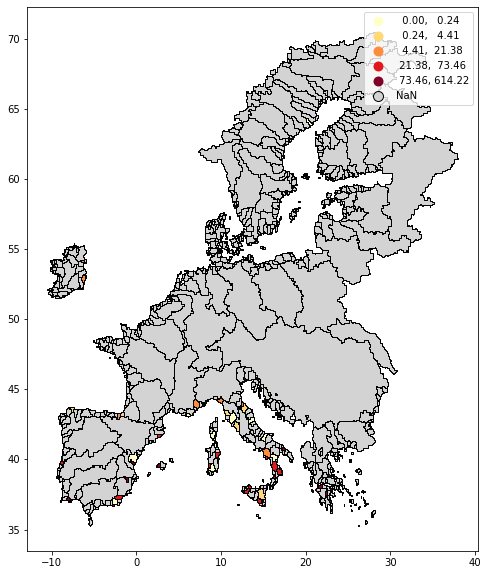

In [8]:
#map_LCIA_annual=gpd.read_file(dir_in+"/code/output/LCIA_NR.gpkg")

continental_eu[continental_eu!=0].plot(column="nr_pol",#this is wrong 
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     cmap="YlOrRd",
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

<AxesSubplot:>

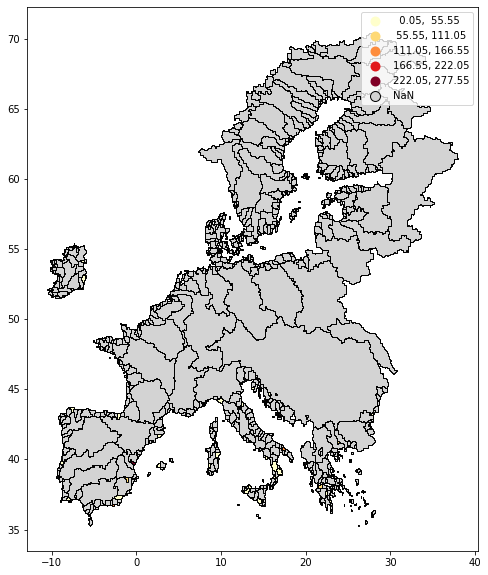

In [9]:
continental_eu[continental_eu!=0].plot(column="nr_pol_path_agri",#map of total unattended demand for agricutlure 
                     #categorical=False,
                     scheme="EqualInterval",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     cmap="YlOrRd",
                     missing_kwds={'color': 'lightgrey'}
                     #missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

<AxesSubplot:>

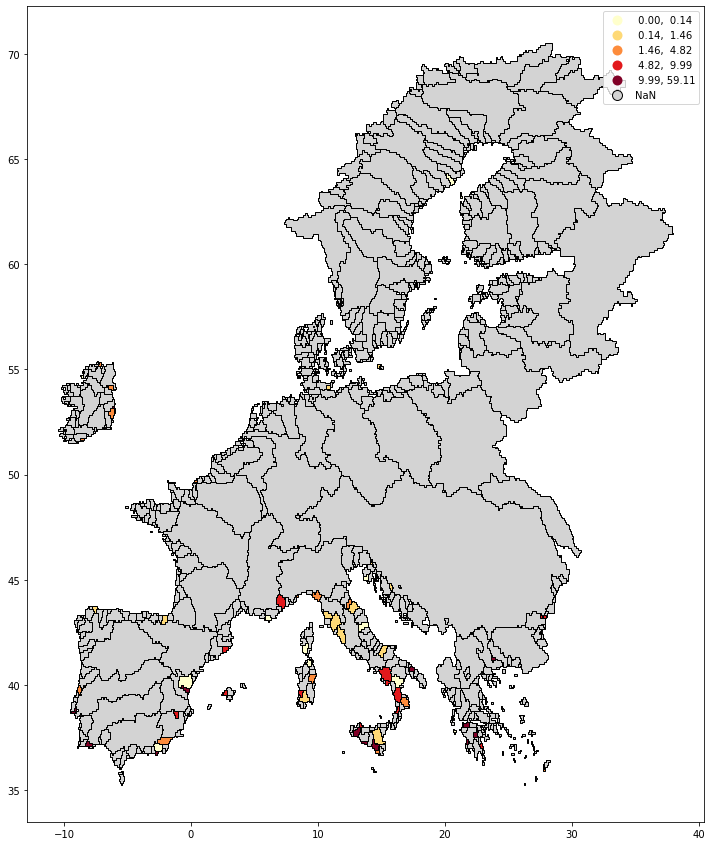

In [10]:
continental_eu[continental_eu!=0].plot(column="nr_pol_path_dom",#map of total unattended demand for domestic
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     #k=100,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'},
                     cmap="YlOrRd",
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

<AxesSubplot:>

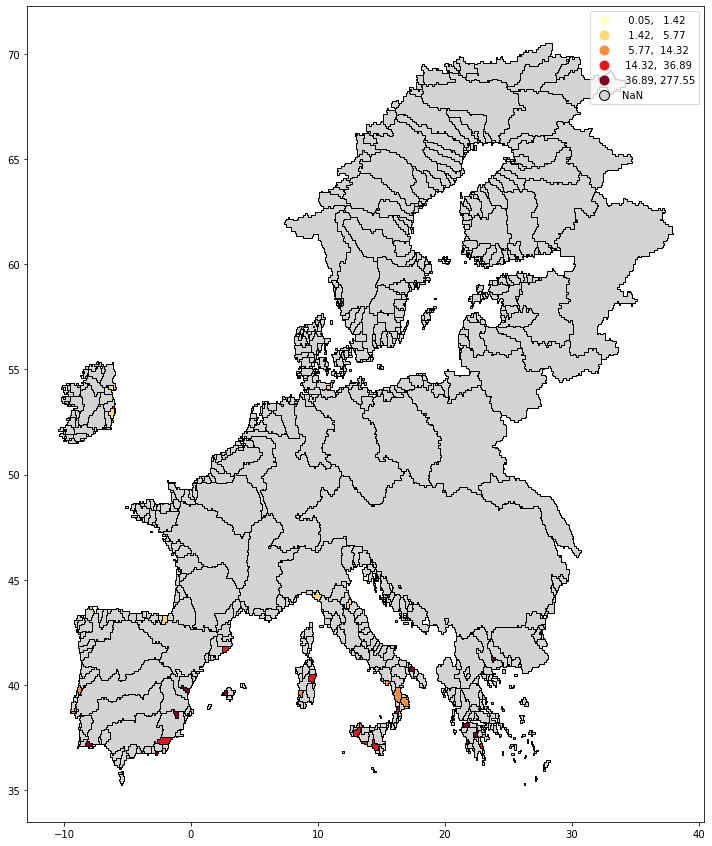

In [11]:
continental_eu[continental_eu!=0].plot(column="nr_pol_path_ind",#map of total unattended demand for industry
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     #k=100,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'},
                    cmap="YlOrRd"
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

add water shortage blue 





In [12]:
#import diluiton matrix 
exposure_volume= pd.read_csv(dir_in+"code/output/channel_storage_month2010_m3.csv")
exposure_volume=exposure_volume.iloc[:,1:]
exposure_volume.columns=["basin",1,2,3,4,5,6,7,8,9,10,11,12]
#["1","2","3","4","5","6",'7','8','9','10','11','12']
exposure_volume=pd.melt(exposure_volume,id_vars= 'basin',value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name="month", value_name="channel_storage")#use panda melt to converto to right format!
exposure_volume=exposure_volume.set_index(["basin","month"])
channel_storage=exposure_volume.loc[(basins)].copy()
#in m3/month




In [13]:
gws=exposure_volume= pd.read_csv(dir_in+"code/output/gws_month2010_m3.csv")
gws=gws.iloc[:,1:]
gws.columns=["basin",1,2,3,4,5,6,7,8,9,10,11,12]
#["1","2","3","4","5","6",'7','8','9','10','11','12']
gws=pd.melt(gws,id_vars= 'basin',value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name="month", value_name="gw_storage")#use panda melt to converto to right format!

gws=gws.set_index(["basin","month"])
gws=gws.loc[(basins)]
gws#in m3

a=channel_storage.loc[basins]["channel_storage"]+gws.loc[basins]["gw_storage"]
a.name="w_avail"
a.sort_index(inplace=True)
a

basin    month
2475.0   1        1.340119e+08
         2        1.304611e+08
         3        1.272750e+08
         4        1.242789e+08
         5        1.227847e+08
                      ...     
24212.0  8        1.083568e+13
         9        1.056462e+13
         10       1.036289e+13
         11       1.019771e+13
         12       1.018500e+13
Name: w_avail, Length: 12372, dtype: float64

In [19]:
qr.sort_index(inplace=True)

In [20]:
basin_wc=LCI["WC"].index.droplevel([1,2])
basin_avail=a.index.droplevel([1])#keep
basin_wc_avail=np.unique(basin_avail[np.isin(basin_avail,basins)&np.isin(basin_avail,basin_wc)])

NameError: name 'LCI' is not defined

In [21]:
shortage=LCI.groupby(["basin","month"]).sum().loc[basin_wc_avail]["WC"]-a.loc[basin_wc_avail]
percentshort=shortage.groupby("basin").sum()/a.groupby("basin").sum().loc[basin_wc_avail]

NameError: name 'LCI' is not defined

In [42]:
shortage[shortage<0]=0
shortage[shortage>0]


basin  month
4541   3          1389.929255
4705   1          4209.233324
       2          4211.490291
       3          4218.724061
       7          2260.280049
                    ...      
15276  8        892799.801745
       9        190797.838349
       10       191244.183959
       11       191592.817918
       12       191867.720041
Length: 573, dtype: float64

In [43]:
#contribution of each sector to total consumption in the river basin per month
weight=LCI.loc[basin_wc_avail]["WC"]/LCI.loc[basin_wc_avail].groupby(["basin","month"]).sum()["WC"]
LCIA_wc_nopol=shortage.loc[basin_wc_avail]*weight
#shortage split across sectors, missing including quality aspects
LCIA_wc_nopol.loc[LCIA_wc_nopol>0]

basin  month  activity   
4541   3      domestic          566.220945
              agriculture       823.708310
4705   1      domestic         1645.283697
              agriculture      2563.949627
       2      domestic         1646.165889
                                 ...      
15276  10     industry        53730.960405
       11     domestic       137763.907149
              industry        53828.910769
       12     domestic       137961.574217
              industry        53906.145824
Length: 1682, dtype: float64

In [44]:
#init - createion of empty array that will be populated with values

LCIA_wc = pd.DataFrame(np.full(LCI["WC"].shape,0), index=LCI.index)
LCIA_wc.columns=["nr_wc_path_dom"]
#LCIA_wc["nr_wc_path_agri"]=LCIA_wc["nr_wc_path_dom"]
#LCIA_wc["nr_wc_path_ind"]=LCIA_wc["nr_wc_path_dom"]

#if water quality for domestic use is good, the shortage of dometic water is:

index2=LCIA_pol.groupby(["basin","month"]).sum()[LCIA_pol.groupby(["basin","month"]).sum()<1].dropna(how="all").index#where there is no pollution issue
index1=shortage[shortage>0].dropna(how="all").index#where there is scarcity issues

#in these basins, there is scarcity but no pollution for dirnging water . extract these values then disaggregate per sector
index_clean=index1[np.isin(index1,index2)]
index_clean


#disagrgegate index for easier manipulation of arrays
b=[]
m=[]
for i in index_clean:
    b.append(i[0])
    m.append(i[1])

for a in ["domestic", "industry", "agriculture"]:

    arrays=[b,m,np.full(len(m),a)]
    tuples=list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=["basin", "month","activity"])
    
    arrays=[b,m,np.full(len(m),"domestic")]
    tuples=list(zip(*arrays))
    indexbis = pd.MultiIndex.from_tuples(tuples, names=["basin", "month","activity"])
#domestic water shortage share is attributed propotionnaly to the sectors contribution
    LCIA_wc.loc[index,"nr_wc_path_dom"]=weight.loc[index]*LCIA_wc_nopol.loc[indexbis].values
    
    arrays=[b,m,np.full(len(m),"industry")]
    tuples=list(zip(*arrays))
    indexbis = pd.MultiIndex.from_tuples(tuples, names=["basin", "month","activity"])
#domestic water shortage share is attributed propotionnaly to the sectors contribution
    LCIA_wc.loc[index,"nr_wc_path_ind"]=weight.loc[index]*LCIA_wc_nopol.loc[indexbis].values

    arrays=[b,m,np.full(len(m),"agriculture")]
    tuples=list(zip(*arrays))
    indexbis = pd.MultiIndex.from_tuples(tuples, names=["basin", "month","activity"])
#domestic water shortage share is attributed propotionnaly to the sectors contribution
    LCIA_wc.loc[index,"nr_wc_path_agri"]=weight.loc[index]*LCIA_wc_nopol.loc[indexbis].values


LCIA_wc.loc[index]#shortage


nr_wc_path_dom  nr_wc_path_ind  nr_wc_path_agri
basin month activity                                                    
4541  3     agriculture      335.557293        0.000000     4.881510e+02
4705  1     agriculture     1002.183580        0.000000     1.561766e+03
      2     agriculture     1002.720945        0.000000     1.562603e+03
      3     agriculture     1004.443246        0.000000     1.565287e+03
      7     agriculture      538.153953        0.000000     8.386393e+02
...                                 ...             ...              ...
12852 11    agriculture     6542.980539        0.000000     1.783959e+04
      12    agriculture      717.073596        0.000000     1.955118e+03
13184 5     agriculture   273920.684259    60612.773248     3.156695e+07
15276 1     agriculture        0.000000        0.000000     0.000000e+00
      2     agriculture        0.000000        0.000000     0.000000e+00

[434 rows x 3 columns]

In [45]:
LCIA_wc.replace(np.nan,0, inplace=True)

In [46]:
LCIA_wc["nr_wc"]=LCIA_wc["nr_wc_path_dom"]+LCIA_wc["nr_wc_path_ind"]+LCIA_wc["nr_wc_path_agri"]
LCIA_wc.loc[index]

nr_wc_path_dom  nr_wc_path_ind  nr_wc_path_agri  \
basin month activity                                                       
4541  3     agriculture      335.557293        0.000000     4.881510e+02   
4705  1     agriculture     1002.183580        0.000000     1.561766e+03   
      2     agriculture     1002.720945        0.000000     1.562603e+03   
      3     agriculture     1004.443246        0.000000     1.565287e+03   
      7     agriculture      538.153953        0.000000     8.386393e+02   
...                                 ...             ...              ...   
12852 11    agriculture     6542.980539        0.000000     1.783959e+04   
      12    agriculture      717.073596        0.000000     1.955118e+03   
13184 5     agriculture   273920.684259    60612.773248     3.156695e+07   
15276 1     agriculture        0.000000        0.000000     0.000000e+00   
      2     agriculture        0.000000        0.000000     0.000000e+00   

                                nr_wc  
basin month activity                   
4541  3     agriculture  8.237083e+02  
4705  1     agriculture  2.563950e+03  
      2     agriculture  2.565324e+03  
      3     agriculture  2.569731e+03  
      7     agriculture  1.376793e+03  
...                               ...  
12852 11    agriculture  2.438257e+04  
      12    agriculture  2.672192e+03  
13184 5     agriculture  3.190148e+07  
15276 1     agriculture  0.000000e+00  
      2     agriculture  0.000000e+00  

[434 rows x 4 columns]

In [47]:
#IMPORTANT RESULTS FOR NR

print(LCIA_wc.groupby(["activity"]).sum())

print(LCIA_wc[LCIA_wc>0].dropna(how="all").groupby(["activity"]).median())

             nr_wc_path_dom  nr_wc_path_ind  nr_wc_path_agri         nr_wc
activity                                                                  
agriculture    6.942707e+07    8.995321e+07     5.898694e+09  6.058074e+09
domestic       1.762350e+07    2.656826e+07     6.942707e+07  1.136188e+08
industry       2.656826e+07    7.738679e+07     8.995321e+07  1.939083e+08
             nr_wc_path_dom  nr_wc_path_ind  nr_wc_path_agri          nr_wc
activity                                                                   
agriculture    55241.617080    50403.113799    593585.875028  883832.873374
domestic        6715.460043     8427.353083     55241.617080  144689.227336
industry        8427.353083     7452.203456     50403.113799  124613.281181


In [48]:
#verifications to do: 
#- no basin with water shortage should have pollution damage simulatneously
#- total shortage + pollution < total consumption

In [49]:
LCI["WC"].groupby("activity").sum()/1e6

activity
agriculture    52785.034068
domestic        4645.288878
industry        8143.028012
Name: WC, dtype: float64

In [50]:
LCIA_NR=LCIA_NR.merge(LCIA_wc.groupby(["basin"]).sum(), on= "basin")


In [51]:
LCIA_wc_sector=pd.pivot(LCIA_wc.groupby(["basin","activity"]).sum().reset_index(), index = 'basin',columns='activity',values = LCIA_wc.columns)
LCIA_wc_sector=pd.concat([LCIA_wc_sector["nr_wc"]["agriculture"],LCIA_wc_sector["nr_wc"]["domestic"],LCIA_wc_sector["nr_wc"]["industry"]], axis = 1)#sector contribution to total unattended demand
LCIA_wc_sector.columns=["nr_wc_sector_agri","nr_wc_sector_dom","nr_wc_sector_ind"]
LCIA_wc_sector["nr_wc"]=LCIA_wc_sector["nr_wc_sector_dom"]+LCIA_wc_sector["nr_wc_sector_ind"]+LCIA_wc_sector["nr_wc_sector_agri"]
LCIA_wc_sector

,nr_wc_sector_agri,nr_wc_sector_dom,nr_wc_sector_ind,nr_wc
basin,,,,
2475,0.0,0.0,0.0,0.0
2476,0.0,0.0,0.0,0.0
2501,0.0,0.0,0.0,0.0
2549,0.0,0.0,0.0,0.0
2723,0.0,0.0,0.0,0.0
...,...,...,...,...
20891,0.0,0.0,0.0,0.0
20980,0.0,0.0,0.0,0.0
21003,0.0,0.0,0.0,0.0


In [52]:
LCIA_NR=LCIA_NR.merge(LCIA_wc_sector.groupby(["basin"]).sum(), on= "basin")


In [53]:
LCIA_NR["nr_wc"]=LCIA_wc_sector["nr_wc"]

In [54]:
LCIA_NR["nr"]=LCIA_NR["nr_wc"]+LCIA_NR["nr_pol"]

In [65]:
LCIA_NR["nr_sector_agri"]=LCIA_NR["nr_pol_sector_agri"]+LCIA_NR["nr_wc_sector_agri"]
LCIA_NR["nr_sector_ind"]=LCIA_NR["nr_pol_sector_ind"]+LCIA_NR["nr_wc_sector_ind"]
LCIA_NR["nr_sector_dom"]=LCIA_NR["nr_pol_sector_dom"]+LCIA_NR["nr_wc_sector_dom"]

LCIA_NR["nr_path_agri"]=LCIA_NR["nr_pol_path_agri"]+LCIA_NR["nr_wc_path_agri"]
LCIA_NR["nr_path_ind"]=LCIA_NR["nr_pol_path_ind"]+LCIA_NR["nr_wc_path_ind"]
LCIA_NR["nr_path_dom"]=LCIA_NR["nr_pol_path_dom"]+LCIA_NR["nr_wc_path_dom"]

In [66]:
LCIA_NR.columns

Index(['nr_pol_path_agri', 'nr_pol_path_dom', 'nr_pol_path_ind', 'nr_pol',
       'nr_pol_sector_agri', 'nr_pol_sector_dom', 'nr_pol_sector_ind',
       'nr_wc_path_dom', 'nr_wc_path_ind', 'nr_wc_path_agri', 'nr_wc_x',
       'nr_wc_sector_agri', 'nr_wc_sector_dom', 'nr_wc_sector_ind', 'nr_wc_y',
       'nr_wc', 'nr', 'nr_sector_agri', 'nr_sector_ind', 'nr_sector_dom',
       'nr_path_agri', 'nr_path_ind', 'nr_path_dom'],
      dtype='object')

In [67]:
#LCIA_NR.to_csv(dir_in+"code/output/LCIA_nr.csv")

In [22]:
LCIA_NR=pd.read_csv(dir_in+"code/output/LCIA_nr.csv").set_index("basin")

In [23]:
LCIA_NR=LCIA_NR/1e6#Million m3

In [24]:
print(LCIA_NR.sum())


nr_pol_path_agri       1752.236383
nr_pol_path_dom         550.495038
nr_pol_path_ind        1643.554384
nr_pol                 3946.285806
nr_pol_sector_agri     3767.659906
nr_pol_sector_dom        19.544853
nr_pol_sector_ind       159.081047
nr_wc_path_dom          113.618836
nr_wc_path_ind          193.908261
nr_wc_path_agri        6058.074088
nr_wc_x                6365.601185
nr_wc_sector_agri      6058.074088
nr_wc_sector_dom        113.618836
nr_wc_sector_ind        193.908261
nr_wc_y                6365.601185
nr_wc                  6365.601185
nr                    10311.886990
nr_sector_agri         9825.733993
nr_sector_ind           352.989309
nr_sector_dom           133.163689
nr_path_agri           7810.310471
nr_path_ind            1837.462645
nr_path_dom             664.113874
dtype: float64


In [25]:
#map drawing



#map_LCIA_annual=basins_map.reset_index().merge(LCIA_sector/1e9,left_on="id_basin_pcrglob",right_on="basin",how ="inner")#km3
map_LCIA_annual=basins_map.reset_index().merge(LCIA_NR,left_on="id_basin_pcrglob",right_on="basin",how ="outer")#km3
map_LCIA_annual.replace(0,np.nan)
continental_eu=map_LCIA_annual[map_LCIA_annual['id_basin_pcrglob']<13000]

<AxesSubplot:>

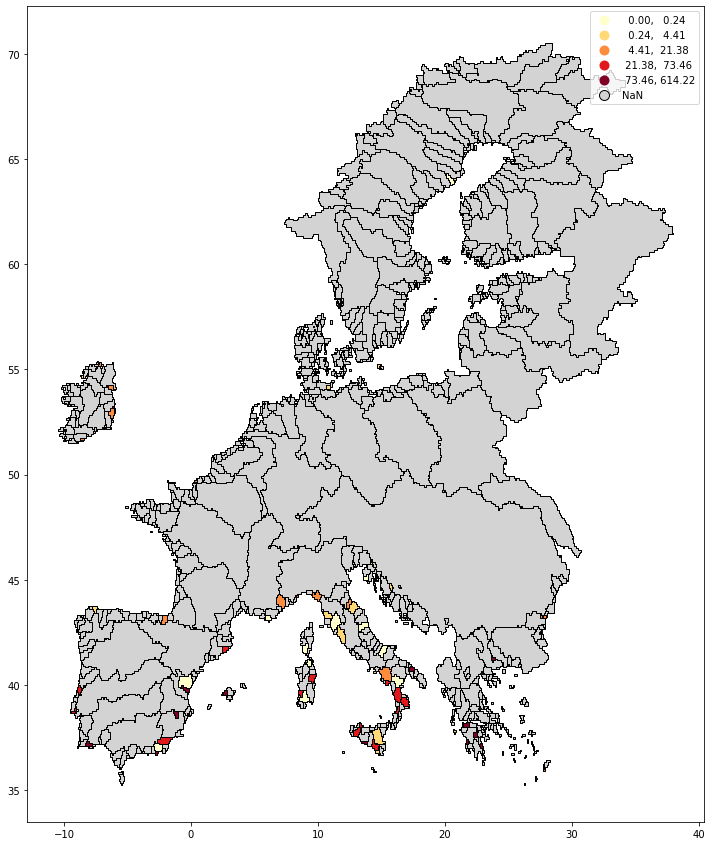

In [28]:


continental_eu[continental_eu!=0].plot(column="nr_pol",#this is wrong 
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'},
                    cmap="YlOrRd"
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

<AxesSubplot:>

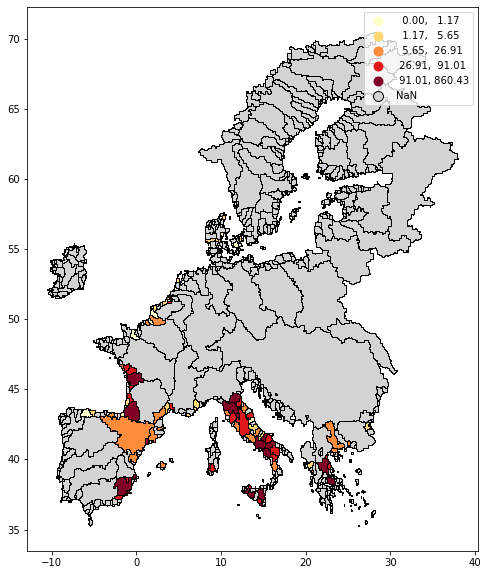

In [29]:

continental_eu[continental_eu!=0].plot(column="nr_wc",
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     cmap="YlOrRd",
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

<AxesSubplot:>

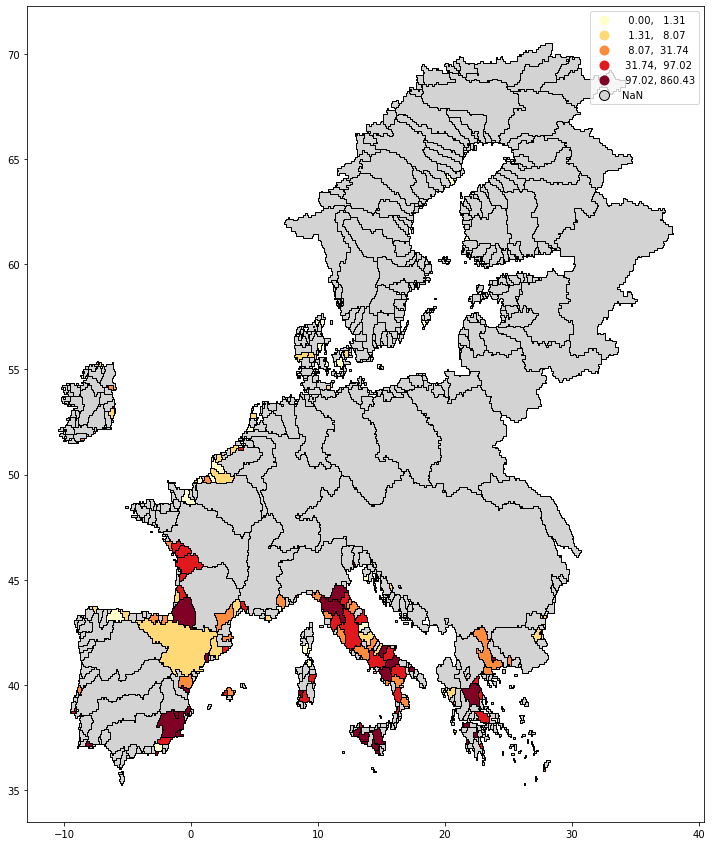

In [31]:
continental_eu[continental_eu!=0].plot(column="nr", 
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'},
                     cmap="YlOrRd"
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

In [69]:
map_LCIA_annual.to_file(dir_in+"code/output/LCIA_NR.gpkg", drive='GPKG')

In [549]:
#important  - with no quality issues we see some water shortage
LCIA_wc=LCIA_wc.groupby(["basin", "activity"]).sum()
print(LCIA_wc.loc[LCIA_wc>0].groupby("activity").median())
print(LCIA_wc.loc[LCIA_wc>0].groupby("activity").sum())

activity
agriculture    1.024355e+07
domestic       5.381915e+05
industry       3.400306e+05
dtype: float64
activity
agriculture    7.267646e+09
domestic       1.489815e+08
industry       2.436112e+08
dtype: float64


In [276]:
LCIA_wc.name = "nr_wc"
LCIA_wc

basin  activity   
2475   agriculture    0.0
       domestic       0.0
       industry       0.0
2476   agriculture    0.0
       domestic       0.0
                     ... 
23276  domestic       0.0
       industry       0.0
24212  agriculture    0.0
       domestic       0.0
       industry       0.0
Name: nr_wc, Length: 3093, dtype: float64

In [277]:
LCIA_wc=pd.pivot(LCIA_wc.reset_index(), index = 'basin',columns='activity' )

In [278]:
LCIA_wc=pd.concat([LCIA_wc["nr_wc"]["agriculture"],LCIA_wc["nr_wc"]["domestic"],LCIA_wc["nr_wc"]["industry"]], axis = 1)#sector contribution to total unattended demand
LCIA_wc.columns=["nr_wcnopol_path_agri","nr_wcnopol_path_dom","nr_wcnopol_path_ind"]
LCIA_wc


,nr_wcnopol_path_agri,nr_wcnopol_path_dom,nr_wcnopol_path_ind
basin,,,
2475,0.0,0.0,0.0
2476,0.0,0.0,0.0
2501,0.0,0.0,0.0
2549,0.0,0.0,0.0
2723,0.0,0.0,0.0
...,...,...,...
20891,0.0,0.0,0.0
20980,0.0,0.0,0.0
21003,0.0,0.0,0.0


In [279]:
LCIA_NR=pd.concat([LCIA_NR,LCIA_wc], axis = 1)

In [459]:
#LCIA_NR["nr_wcnopol_path_dom"].iloc[:,0]+LCIA_NR["nr_wcnopol_path_ind"]+LCIA_NR["nr_wcnopol_path_agri"].iloc[:,0]

In [292]:
LCIA_NR["nr_wc_nopol"]=LCIA_NR["nr_wcnopol_path_agri"].iloc[:,0]+LCIA_NR["nr_wcnopol_path_dom"].iloc[:,0]+LCIA_NR["nr_wcnopol_path_ind"]

In [293]:
#LCIA_NR.to_csv(dir_in+"code/output/LCIA_nr1.csv")

In [294]:
map_LCIA_annual1=map_LCIA_annual.merge(LCIA_NR,left_on="id_basin_pcrglob",right_on="basin",how ="outer")#km3
map_LCIA_annual1.replace(0,np.nan)

,id_basin_pcrglob,area,perimeter,geometry,nr_pol_path_agri_x,nr_pol_path_dom_x,nr_pol_path_ind_x,nr_pol_sector_agri_x,nr_pol_sector_dom_x,nr_pol_sector_ind_x,...,nr_pol_sector_dom_y,nr_pol_sector_ind_y,nr_pol_y,nr_wcnopol_path_agri,nr_wcnopol_path_dom,nr_wcnopol_sector_ind,nr_wcnopol_path_agri,nr_wcnopol_path_dom,nr_wcnopol_path_ind,nr_wc
0,2501,3.720166e+09,4.562512e+05,"MULTIPOLYGON (((21.08333 69.91667, 21.08333 69...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2475,6.680307e+08,1.506541e+05,"MULTIPOLYGON (((20.66667 69.66667, 20.66667 69...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2476,1.345447e+09,3.376167e+05,"MULTIPOLYGON (((20.00000 69.58333, 20.00000 69...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2549,4.418529e+09,5.690003e+05,"MULTIPOLYGON (((29.83333 69.91667, 29.83333 69...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2732,2.420361e+10,1.851546e+06,"MULTIPOLYGON (((22.50000 69.08333, 22.50000 69...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,13186,2.113069e+08,7.084536e+04,"MULTIPOLYGON (((33.41667 34.91667, 33.41667 34...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027,13205,1.056953e+09,1.720921e+05,"MULTIPOLYGON (((32.58333 35.00000, 32.58333 34...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,13187,4.227536e+08,1.012166e+05,"MULTIPOLYGON (((33.25000 35.00000, 33.25000 34...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,13231,8.462769e+08,1.350459e+05,"MULTIPOLYGON (((32.83333 34.91667, 32.83333 34...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
map_LCIA_annual1.to_file(dir_in+"/code/output/LCIA_NR1.gpkg", driver="GPKG")#needs to be corrected the water ocnsumtion is too high


C:\Users\easpi\Miniconda3\envs\waterfootprint2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [28]:
map_LCIA_annual1= gpd.read(dir_in+"/code/output/LCIA_NR1.gpkg", driver="GPKG")#needs to be corrected the water ocnsumtion is too high


AttributeError: module 'geopandas' has no attribute 'read'

In [295]:
continental_eu=map_LCIA_annual1[map_LCIA_annual1['id_basin_pcrglob']<14000]

<AxesSubplot:>

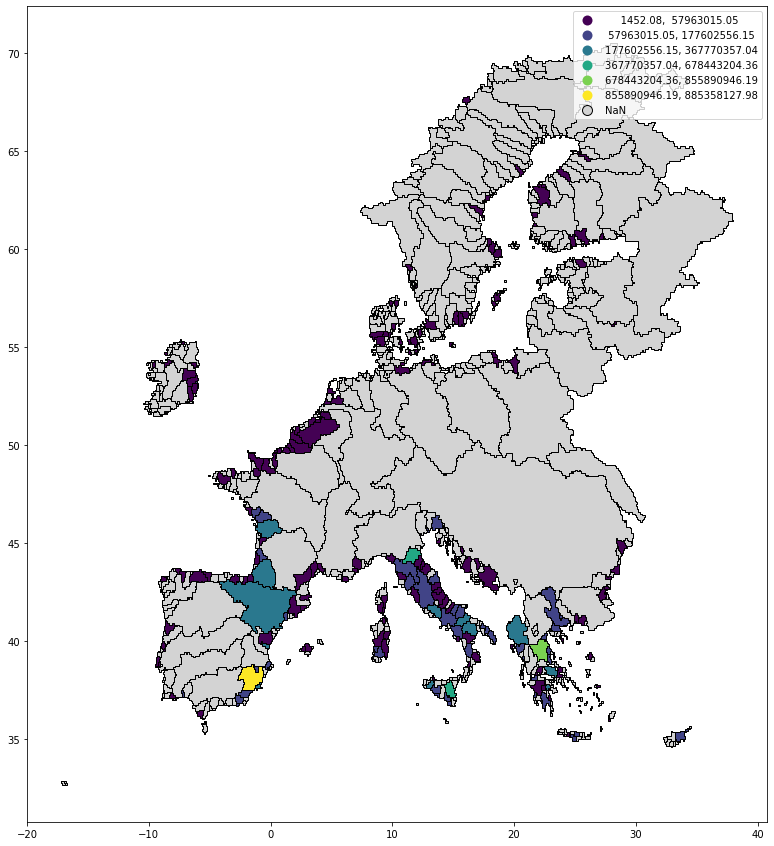

In [297]:
continental_eu[continental_eu!=0].plot(column="nr_wc_nopol",#with no quality aspects
                     #categorical=False,
                     scheme="HeadTailBreaks",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

In [329]:
#now pollution aspects should be taken into account.
LCIA_NR.columns

Index(['nr_pol_path_agri', 'nr_pol_path_dom', 'nr_pol_path_ind',
       'nr_pol_sector_agri', 'nr_pol_sector_dom', 'nr_pol_sector_ind',
       'nr_pol', 'nr_wcnopol_path_agri', 'nr_wcnopol_path_dom',
       'nr_wcnopol_sector_ind', 'nr_wcnopol_path_agri', 'nr_wcnopol_path_dom',
       'nr_wcnopol_path_ind', 'nr_wc'],
      dtype='object')

In [417]:
weighted_shortage=shortage.loc[basin_wc_avail]*LCI.loc[basin_wc_avail]["WC"]/LCI.loc[basin_wc_avail].groupby(["basin","month"]).sum()["WC"]
weighted_shortage

basin  month  activity   
2475   1      domestic       NaN
              industry       NaN
              agriculture    NaN
       2      domestic       NaN
              industry       NaN
                            ... 
24212  11     industry       0.0
              agriculture    0.0
       12     domestic       0.0
              industry       0.0
              agriculture    0.0
Length: 37116, dtype: float64

In [418]:
#lcia with pollution
weighted_shortage=shortage.loc[basin_wc_avail]*LCI.loc[basin_wc_avail]["WC"]/LCI.loc[basin_wc_avail].groupby(["basin","month"]).sum()["WC"]
def combined_shortage_with_pollution(w_dom, basins, wateruse, weighted_shortage):

    weight_dom=w_dom.loc[basins].sum(axis = 1)#weighting fctors for pollution_dom#this represents the weight of each activity in problems with pollution for domestic use 
    weight_dom.name="weight"

    bool_dom=weight_dom.groupby(["basin","month"]).sum()#boolean equal to 1 where there are problems of quality
#print(bool_dom)

    weight_dom=pd.pivot(weight_dom.reset_index(), index = ['basin',"month"],columns='activity', values="weight" )
    weight_dom.columns=["agriculture","domestic","industry"]
#print(weight_dom)
#multiply the weight by (1-bool dom) and the weighted shortage
    is_poluted=weight_dom.multiply((1-bool_dom),axis=0)
#print(is_poluted)
    wc=weighted_shortage.loc[basins, slice(None),wateruse]
#wc.reset_index().drop(columns = {"activity"})
    

    return is_poluted.multiply(wc.values, axis = 0)

In [429]:
LCIA_wc_pol_dom=combined_shortage_with_pollution(w_dom, basins,"domestic",weighted_shortage)
LCIA_wc_pol_ind=combined_shortage_with_pollution(w_ind,basins,"industry",weighted_shortage)
LCIA_wc_pol_agri=combined_shortage_with_pollution(w_agri,basins,"agriculture",weighted_shortage)

In [440]:
LCIA_wc_pol_dom.groupby("basin").sum()["domestic"]

basin
2475     0.0
2476     0.0
2501     0.0
2549     0.0
2723     0.0
        ... 
20891    0.0
20980    0.0
21003    0.0
23276    0.0
24212    0.0
Name: domestic, Length: 1031, dtype: float64

In [444]:
#report pathway impacts
LCIA_NR["nr_wc_path_dom"]=LCIA_wc_pol_dom.sum(axis=1).groupby("basin").sum()
LCIA_NR["nr_wc_path_ind"]=LCIA_wc_pol_ind.sum(axis=1).groupby("basin").sum()
LCIA_NR["nr_wc_path_agri"]=LCIA_wc_pol_agri.sum(axis=1).groupby("basin").sum()

In [445]:
#report sector impacts
LCIA_NR["nr_wc_sector_dom"]=LCIA_wc_pol_dom.groupby("basin").sum()["domestic"]+LCIA_wc_pol_ind.groupby("basin").sum()["domestic"]+LCIA_wc_pol_agri.groupby("basin").sum()["domestic"]
LCIA_NR["nr_wc_sector_ind"]=LCIA_wc_pol_dom.groupby("basin").sum()["industry"]+LCIA_wc_pol_ind.groupby("basin").sum()["industry"]+LCIA_wc_pol_agri.groupby("basin").sum()["industry"]
LCIA_NR["nr_wc_sector_agri"]=LCIA_wc_pol_dom.groupby("basin").sum()["agriculture"]+LCIA_wc_pol_ind.groupby("basin").sum()["agriculture"]+LCIA_wc_pol_agri.groupby("basin").sum()["agriculture"]

In [496]:
#LCIA_NR["nr_wcnopol"]=LCIA_NR["nr_wc"]
LCIA_NR["nr_wc"]=LCIA_NR["nr_wc_path_dom"]+LCIA_NR["nr_wc_path_ind"]+LCIA_NR["nr_wc_path_agri"]
LCIA_NR["nr_path_dom"]=LCIA_NR["nr_wc_path_dom"]+LCIA_NR["nr_pol_path_dom"]
LCIA_NR["nr_path_ind"]=LCIA_NR["nr_wc_path_ind"]+LCIA_NR["nr_pol_path_ind"]
LCIA_NR["nr_path_agri"]=LCIA_NR["nr_wc_path_agri"]+LCIA_NR["nr_pol_path_agri"]

LCIA_NR["nr_sector_dom"]=LCIA_NR["nr_wc_sector_dom"]+LCIA_NR["nr_pol_sector_dom"]
LCIA_NR["nr_sector_ind"]=LCIA_NR["nr_wc_sector_ind"]+LCIA_NR["nr_pol_sector_ind"]
LCIA_NR["nr_sector_agri"]=LCIA_NR["nr_wc_sector_agri"]+LCIA_NR["nr_pol_sector_agri"]

LCIA_NR["nr"]=LCIA_NR["nr_sector_agri"]+LCIA_NR["nr_sector_ind"]+LCIA_NR["nr_sector_dom"]

In [535]:
temp=LCIA_wc_pol_dom.groupby("basin").sum()
temp[temp>1].dropna()

,agriculture,domestic,industry
basin,,,


<AxesSubplot:>

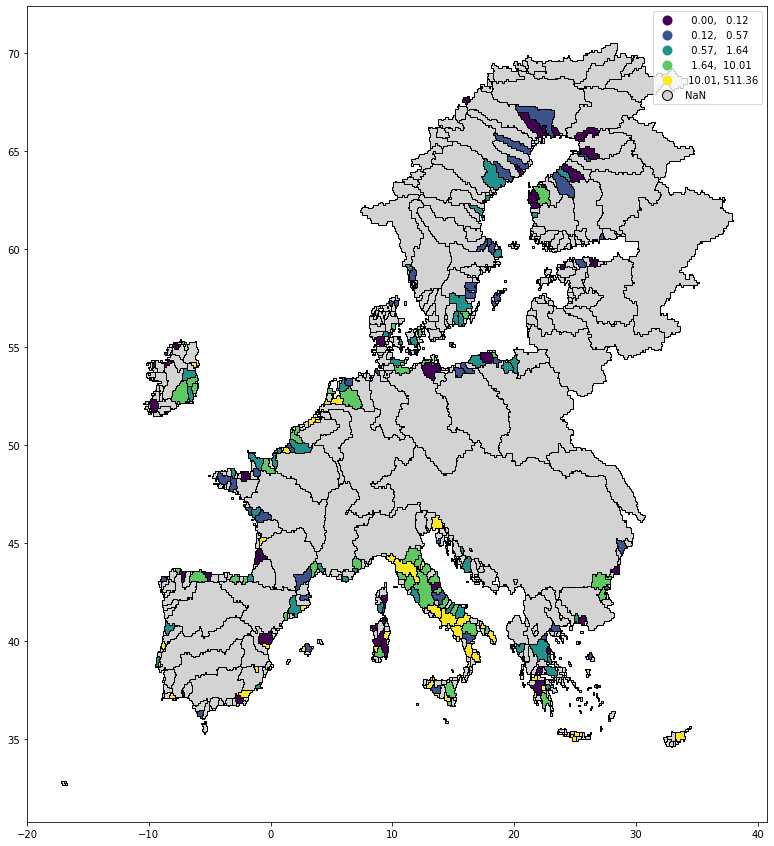

In [514]:
temp=LCIA_NR[LCIA_NR>1].dropna(how="all")
test=basins_map.reset_index().merge(temp/1e6,left_on="id_basin_pcrglob",right_on="basin",how ="outer")#km3
#map_LCIA_annual2.replace(0,np.nan)
map_test=test[test['id_basin_pcrglob']<14000]
map_test.plot(column="nr",#with no quality aspects
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

In [498]:
LCIA_NR.to_csv(dir_in+"code/output/LCIA_nr2.csv")

In [499]:
#make maps


map_LCIA_annual2=basins_map.reset_index().merge(LCIA_NR,left_on="id_basin_pcrglob",right_on="basin",how ="outer")#km3
#map_LCIA_annual2.replace(0,np.nan)
continental_eu=map_LCIA_annual2[map_LCIA_annual2['id_basin_pcrglob']<14000]

<AxesSubplot:>

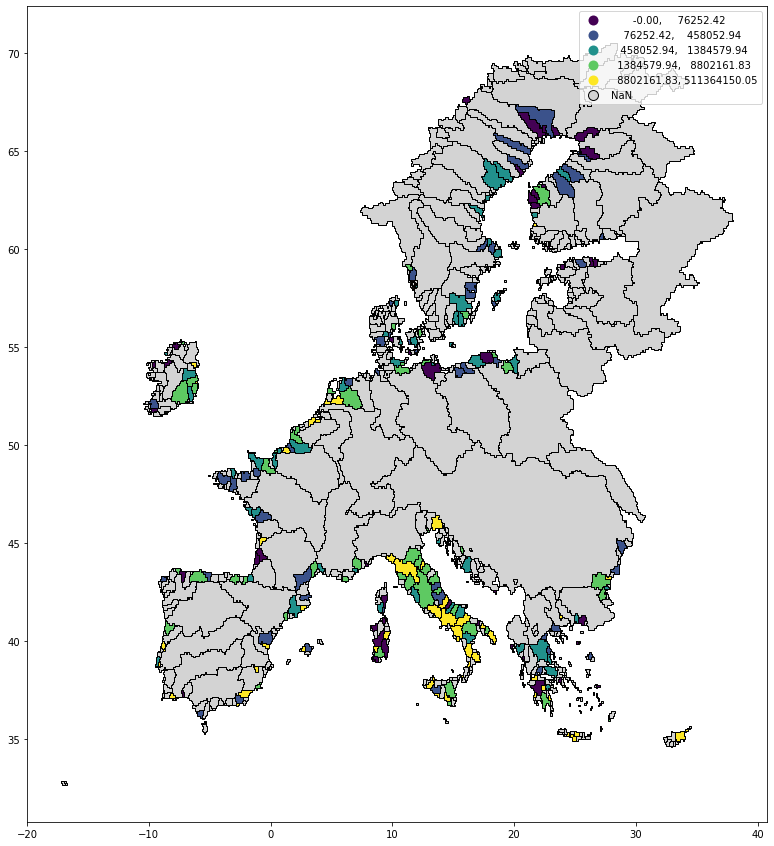

In [502]:
continental_eu[continental_eu!=0].plot(column="nr",#with no quality aspects
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

In [ ]:
#removing quality requirement form the shortage assessment
def lcia_nr_wc_noquali(a, LCI, basins):
    shortage = pd.DataFrame(np.zeros(LCI["WC"].copy().shape))#initiatization
    shortage.index = LCI.index#change values depending on availability. at the moment shortage = demand
    shortage.columns = ["nr_wc_noquali"]#name of columns -> natural ressource impact, due to consumption, uunattended demand for water use <name>



    basin_wc=LCI["WC"].index.droplevel([1,2])
    basin_avail=a.index.droplevel([1])#keep

    #caluclate water shortage associated with each basin, month, activity, (rows) for a specific water use (cols) defined by the quality requirement 
    for basin in basins:
        #check if hte basin has data, if not. put shortage to NA
        if (np.isin(basin,basin_avail))&(np.isin(basin,basin_wc)):

            for month in np.arange(1,13,1):
                demand = LCI.loc[(basin, month)]['WC']
                short = demand.sum()-a.loc[(basin, month)].values[0] 
                if short<0:#if there is not enough water
                    shortage.loc[(basin,month)]["nr_wc_noquali"]=0
                else:
                    for activity in ["agriculture","industry","domestic"]:
                        share=demand.loc[(activity)]/demand.sum()#otherwise the activity has a shar eof responsibility in the shortage
                        shortage.loc[(basin,month,activity)]["nr_wc_noquali"]=share*short
        else:
            shortage.loc[(basin)]["nr_wc_noquali"]=np.nan#if there is a missing data, put nan
    return shortage.groupby(['basin','activity']).sum().replace(0,np.nan)

In [176]:
LCIA=lcia_nr_wc_noquali(a, LCI, basins)
LCIA.dropna()#empty because quality is always an issue?

C:\Users\easpi\AppData\Local\Temp/ipykernel_5948/153466708.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  demand = LCI.loc[(basin, month)]['WC']
C:\Users\easpi\AppData\Local\Temp/ipykernel_5948/153466708.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.
  shortage.loc[(basin,month)]["nr_wc_noquali"]=0


nr_wc_noquali
basin activity                  
2732  agriculture   4.634008e+08
      domestic      7.585201e+08
      industry      1.799546e+08
3952  agriculture   1.137918e+08
      domestic      2.930998e+08
...                          ...
13088 domestic      4.017862e+08
      industry      1.911912e+08
13232 agriculture   1.885008e+10
      domestic      7.215527e+08
      industry      2.646652e+08

[338 rows x 1 columns]

In [190]:
LCIA.groupby("activity").sum()

,nr_wc_noquali
activity,
agriculture,3.972295e+12
domestic,1.048490e+12
industry,1.288740e+12


In [185]:

LCIA_sector=pd.pivot(LCIA.reset_index(), index = 'basin',columns='activity',values = LCIA.columns )
LCIA_sector=pd.concat([LCIA_sector["nr_wc_noquali"]["agriculture"],LCIA_sector["nr_wc_noquali"]["domestic"],LCIA_sector["nr_wc_noquali"]["industry"]], axis = 1)#sector contribution to total unattended demand
LCIA_sector.columns=["nr_wc_noquali_agri","nr_wc_noquali_dom","nr_wc_noquali_ind"]
LCIA_sector["nr_wc_noquali"]=LCIA_sector["nr_wc_noquali_agri"]+LCIA_sector["nr_wc_noquali_ind"]+LCIA_sector["nr_wc_noquali_dom"]
LCIA_sector.dropna()

,nr_wc_noquali_agri,nr_wc_noquali_dom,nr_wc_noquali_ind,nr_wc_noquali
basin,,,,
2732,4.634008e+08,7.585201e+08,1.799546e+08,1.401876e+09
3952,1.137918e+08,2.930998e+08,7.885606e+08,1.195452e+09
4036,6.753570e+06,2.645005e+08,3.047048e+08,5.759589e+08
4070,5.665034e+08,2.418693e+09,8.032298e+08,3.788426e+09
4228,5.678080e+06,1.486652e+08,1.705027e+08,3.248460e+08
...,...,...,...,...
12652,4.269849e+10,2.208521e+09,1.007453e+09,4.591446e+10
12654,1.163894e+11,9.076250e+09,4.149153e+09,1.296148e+11
12738,2.333186e+11,1.606815e+10,7.340554e+09,2.567273e+11


In [186]:
map_LCIA_annual2=map_LCIA_annual1.merge(LCIA_sector/1e9,left_on="id_basin_pcrglob",right_on="basin",how ="outer")#km3


In [187]:
map_LCIA_annual2.to_file(dir_in+"/code/output/LCIA_NR_full.gpkg", driver="GPKG")#needs to be corrected the water ocnsumtion is too high

In [30]:
map_LCIA_annual2=gpd.read_file(dir_in+"/code/output/LCIA_NR.gpkg", driver="GPKG")#needs to be corrected the water ocnsumtion is too high

KeyError: 'nr_wc_noquali'

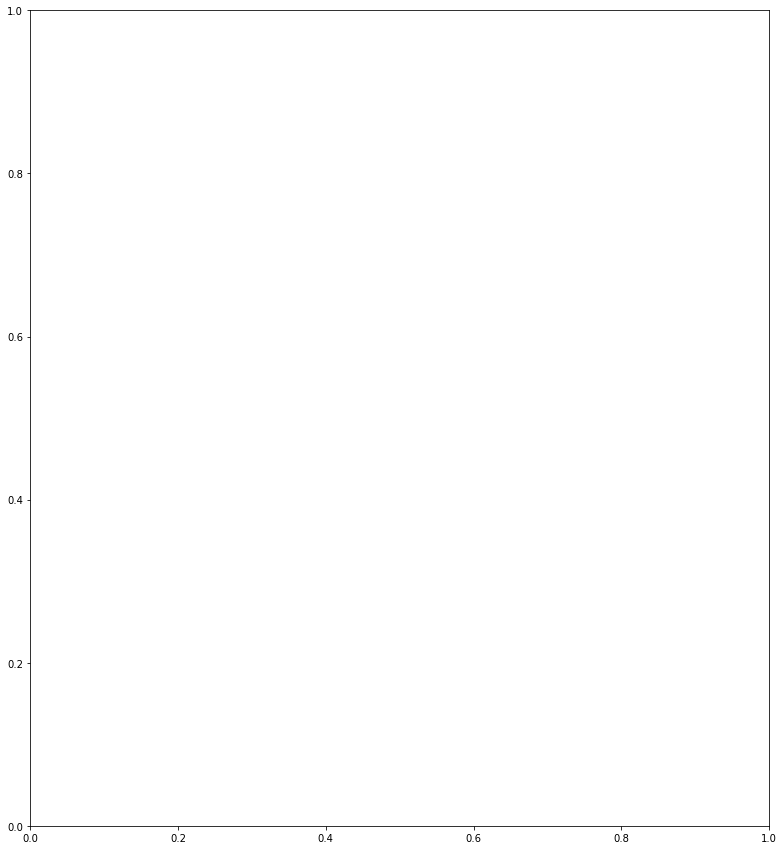

In [31]:
map_LCIA_annual2.replace(0,np.nan).plot(column="nr_wc_noquali",#this is wrong 
                     #categorical=False,
                     scheme="HeadTailBreaks",
                     edgecolor="k",
                     #vmin=0,
                     #k=100,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                     missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )

#populate chemicals and water consumption. there are no CFs for 
basin = 0#adapt

for basin in basins:

        
    for month in np.arange(1,13,1):
        
               
            #c_env.loc[(basin,month)]["WC"]=(LCI.loc[(basin,month)]["WC"].sum())
            
        if exposure_volume.loc[(basin,month)]["channel_storage"]>0:
        
            c_env.loc[(basin,month)]["P"]=(LCI.loc[(basin,month)]["P"].sum())*1/exposure_volume.loc[(basin,month)]["channel_storage"]
        #fate assumed equal to 1, P emissions in kg/month . includ efate from Payen 2021
                    
            for substance in cas:

                c_env.loc[(basin,month)][substance]=(LCI.loc[(basin,month)][substance].sum()*12/365)*CF_usetox.loc[(substance)]['FF_freshwater']/exposure_volume.loc[(basin,month)]["channel_storage"]
            #ecotox FF in day,  volume of dilution in m3, substance emission in kg/month->convert to kg/day
        #env concentration in kg/m3


alternative formulation with concentration exceededce 


WQ_dom = pd.DataFrame(np.zeros(c_env.shape), index=c_env.index)
WQ_dom.columns=c_env.columns

basin = 0#adapt

for basin in basins:

    for month in np.arange(1,13,1):
        
        WQ_dom.loc[(basin,month)]["WC"]=(c_env.loc[(basin,month)]["WC"])
        
        if c_env.loc[(basin,month)]["P"].sum()>(1000*qr.loc[("7723-14-0")]["QR_domestic1"]):
            WQ_dom.loc[(basin,month)]["P"]=1  #phosphorus total from all sectors in kg/m3
        #quality requirement in mg/L thus multiply by 1000 to ocnverto to kg/m3 (environmental concentration in kg/m3)
        
        for substance in cas:
            if c_env.loc[(basin,month)][substance].sum()>(1000*qr.loc[substance]["QR_domestic1"]):
                WQ_dom.loc[(basin,month)][substance]=1

#re-write this in a more clever way
def lcia_nr(LCI, WQ, basins,name):
    #the impact of activities in LCI on natural resources for a give quality assessment WQ (name refers to the type of water use)

    weighting2=weighing(LCI, WQ, basins)
    w=weighting2.sum(axis=1)
    LCIA_natural_resources=pd.DataFrame(np.empty(w.shape), index=w.index)
    LCIA_natural_resources.columns = ["nr_pol_path_"+name]


    basin = 0#adapt

    for basin in basins:

        for month in np.arange(1,13,1):

            for activity in ["domestic", "industry", "agriculture"]:

                LCIA_natural_resources.loc[(basin,month,activity)]["nr_pol_path_"+name]=w.loc[(basin,month,activity)]*LCI.loc[(basin,month,name)]["WC"]#here we check the quality requeirment for domestic use therefore the unattended demand is a fraciton of the domestic use
    
    #LCIA_natural_resources["NR_poll_"+name]=LCIA_natural_resources.sum(axis = 1)#aggregate per chemicals
    
    LCIA_natural_resources_yr =LCIA_natural_resources.sum(axis =1).groupby(['basin','activity']).sum()#aggregate per year summing all months
    
    return LCIA_natural_resources, LCIA_natural_resources_yr, weighting2

LCIA_dom0=lcia_nr(LCI,WQ_dom, basins,"domestic")#element 1=year aggregate, element 0 is month aggregate
LCIA_dom=LCIA_dom0[1]#possible to extract weighting matrix and monthly results as well
#LCIA_dom#unattended demand for domestic use